<a href="https://colab.research.google.com/github/ScriptSherpa/AI-and-Ml-journey/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Supervised ML --> Regression :->Simple Linear Regression
# import all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
 #STage 1: Data  Gathering /Load A Dataset
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Grade_Set_1.csv')
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [5]:
# Stage 2 : EDA
data.shape

(9, 4)

In [6]:
data.columns

Index(['Hours_Studied', 'Test_Grade', 'Status', 'Result'], dtype='object')

In [7]:
# Stage 3 : Data Preparation
# a.) check for missing and duplicate values
# b.)convert non-numerical features into numerical features
# c.)normalization
# d.)Select ddependent and independent variable
#a.)check for missing and duplicate values
data.isnull().sum()

,0
Hours_Studied,0
Test_Grade,0
Status,0
Result,0


In [8]:
data.duplicated().sum()

0

In [9]:
# b.)convert non-numerical features into numerical feature
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()

In [10]:
lb.fit_transform(['fail','pass'])

array([[0],
       [1]])

In [11]:
data.Status = lb.fit_transform(data.Status)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      int64 
 3   Result         9 non-null      object
dtypes: int64(3), object(1)
memory usage: 420.0+ bytes


In [13]:
# MinMax Normalization
data.Test_Grade.values

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [14]:
xnorm = 57-57/100-57
xnorm

-0.5700000000000003

In [15]:
vals = data.Test_Grade.values
print(vals)

#nrmlz_val1 = pp.normalize([vals])
#print(nrmlz_val1)

[ 57  66  73  76  79  81  90  96 100]


In [16]:
#nrmlz = pp.MinMaxScaler()
#nrmlz_val2 = nrmlz.fit_transform([vals])
#print(nrmlz_val2)

In [17]:
#dep variable
y = data.Test_Grade.values
y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [18]:
#select dependent and indep variable
#indep var
x = data.Hours_Studied.values
x=x.reshape(9,1)
x.shape

(9, 1)

In [19]:
# d.)select dependent and independent variable

# independent variable
x = data.Hours_Studied.values
x = x.reshape(9,1)
x.shape

(9, 1)

In [20]:
# dependent variable
y = data.Test_Grade.values
y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [21]:
# Stage 4 : Build A Predictive Model
# Apply a suitable ML Algo Dataset

import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

In [22]:
lin_reg.fit(x,y)          #Machine learning model

LinearRegression()

In [25]:
# Stage 5 : Evaluation
data['predictedValues'] = lin_reg.predict(x)

In [24]:
data[['Hours_Studied','Test_Grade','predictedValues']]

,Hours_Studied,Test_Grade,predictedValues
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [26]:
pred_values = lin_reg.predict(x)
print(pred_values)

[59.71111111 64.72777778 69.74444444 74.76111111 79.77777778 84.79444444
 89.81111111 94.82777778 99.84444444]


In [27]:
# r2_score --> regression score function provides accurate values
from sklearn.metrics import r2_score
accuracy = r2_score(y,pred_values)
print('regression score function :',accuracy)
print(f'Accuracy Of The Model : {int(accuracy*100)}%')

regression score function : 0.9757431074095347
Accuracy Of The Model : 97%


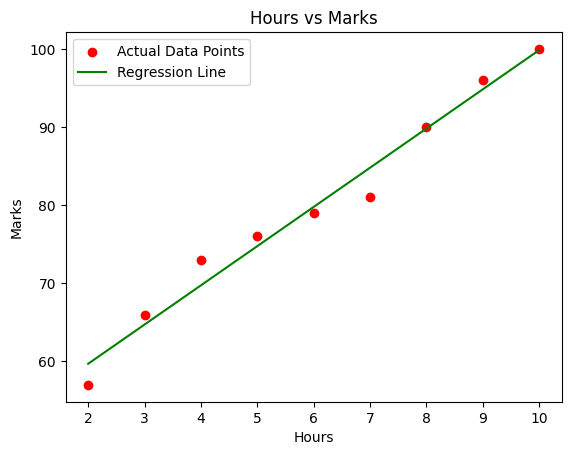

In [28]:
# plot actual values
plt.scatter(x,y,color='red',label='Actual Data Points')
# plot predicted values
plt.plot(x,pred_values,color='green',label='Regression Line')
plt.title('Hours vs Marks')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()
plt.show()

In [ ]:
# Stage 6: Final Predictions
hrs = float(input('Enter How Many Hours Studied : '))
marks = lin_reg.predict([[hrs]])
print('You Can Score',int(marks[0]),'Marks')